Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.3/258.3 kB 2.3 MB/s eta 0:00:00a 0:00:01

[notice] A new release of pip is available: 23.1.2 -> 24.2
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip
Polynomial Features (Degree=2) Accuracy: 0.9267 (± 0.0230)
PCA (n_components=10) Accuracy: 0.8377 (± 0.0354)
SMOTE Logistic Regression Accuracy: 0.8767
Class Weighted Logistic Regression Accuracy: 0.8663 (± 0.0320)
Random Forest Accuracy: 0.9210 (± 0.0279)
Gradient Boosting Accuracy: 0.9223 (± 0.0253)
Time-Series Split Logistic Regression Accuracy: 0.8627 (± 0.0134)
Best Parameters (Regularization): {'C': 0.01, 'solver': 'lbfgs'}
Best Accuracy (Regularization): 0.8680


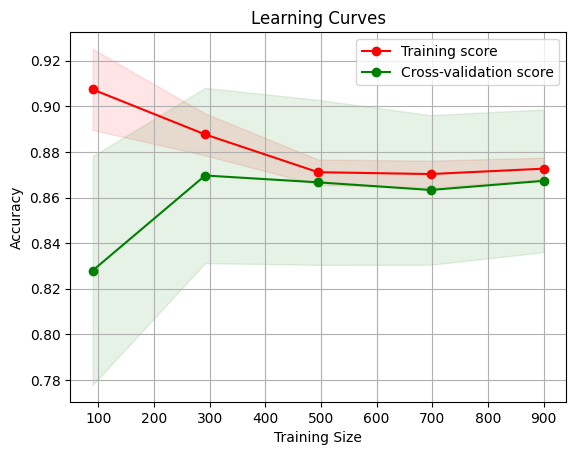

In [2]:
# Install necessary libraries
!pip install scikit-learn matplotlib imbalanced-learn

# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score, RepeatedKFold, GridSearchCV, TimeSeriesSplit, train_test_split, learning_curve
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE

# Generate Synthetic Dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=1)
rkf = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

# 1. Polynomial Features
degree = 2
poly_model = Pipeline([('poly', PolynomialFeatures(degree=degree)), ('logistic', LogisticRegression(max_iter=1000))])
poly_scores = cross_val_score(poly_model, X, y, scoring='accuracy', cv=rkf, n_jobs=-1)
print(f'Polynomial Features (Degree={degree}) Accuracy: {np.mean(poly_scores):.4f} (± {np.std(poly_scores):.4f})')

# 2. Dimensionality Reduction (PCA)
n_components = 10
pca_model = Pipeline([('pca', PCA(n_components=n_components)), ('logistic', LogisticRegression(max_iter=1000))])
pca_scores = cross_val_score(pca_model, X, y, scoring='accuracy', cv=rkf, n_jobs=-1)
print(f'PCA (n_components={n_components}) Accuracy: {np.mean(pca_scores):.4f} (± {np.std(pca_scores):.4f})')

# 3. Handling Class Imbalance with SMOTE
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
smote = SMOTE(random_state=1)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)
model_smote = LogisticRegression(max_iter=1000)
model_smote.fit(X_resampled, y_resampled)
y_pred = model_smote.predict(X_test)
smote_accuracy = accuracy_score(y_test, y_pred)
print(f'SMOTE Logistic Regression Accuracy: {smote_accuracy:.4f}')

# 4. Class Weighting
model_weighted = LogisticRegression(class_weight='balanced', max_iter=1000)
weighted_scores = cross_val_score(model_weighted, X, y, scoring='accuracy', cv=rkf, n_jobs=-1)
print(f'Class Weighted Logistic Regression Accuracy: {np.mean(weighted_scores):.4f} (± {np.std(weighted_scores):.4f})')

# 5. Ensemble Methods
# Random Forest
model_rf = RandomForestClassifier(n_estimators=100, random_state=1)
rf_scores = cross_val_score(model_rf, X, y, scoring='accuracy', cv=rkf, n_jobs=-1)
print(f'Random Forest Accuracy: {np.mean(rf_scores):.4f} (± {np.std(rf_scores):.4f})')

# Gradient Boosting
model_gb = GradientBoostingClassifier(n_estimators=100, random_state=1)
gb_scores = cross_val_score(model_gb, X, y, scoring='accuracy', cv=rkf, n_jobs=-1)
print(f'Gradient Boosting Accuracy: {np.mean(gb_scores):.4f} (± {np.std(gb_scores):.4f})')

# 6. Cross-Validation Strategy (TimeSeriesSplit)
tscv = TimeSeriesSplit(n_splits=5)
model_ts = LogisticRegression(max_iter=1000)
ts_scores = cross_val_score(model_ts, X, y, scoring='accuracy', cv=tscv, n_jobs=-1)
print(f'Time-Series Split Logistic Regression Accuracy: {np.mean(ts_scores):.4f} (± {np.std(ts_scores):.4f})')

# 7. Regularization
param_grid_reg = {'C': [0.01, 0.1, 1, 10, 100], 'solver': ['liblinear', 'lbfgs']}
grid_reg = GridSearchCV(estimator=LogisticRegression(max_iter=1000), param_grid=param_grid_reg, scoring='accuracy', cv=rkf, n_jobs=-1)
grid_reg.fit(X, y)
print(f'Best Parameters (Regularization): {grid_reg.best_params_}')
print(f'Best Accuracy (Regularization): {grid_reg.best_score_:.4f}')

# 8. Learning Curves
train_sizes, train_scores, test_scores = learning_curve(LogisticRegression(max_iter=1000), X, y, cv=rkf, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 5), scoring='accuracy')
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot learning curves
plt.plot(train_sizes, train_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_mean, 'o-', color="g", label="Cross-validation score")
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="r", alpha=0.1)
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="g", alpha=0.1)
plt.title('Learning Curves')
plt.xlabel('Training Size')
plt.ylabel('Accuracy')
plt.legend(loc="best")
plt.grid()
plt.show()
